Recommendation line by line

In [1]:
import pandas as pd
import re
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
import string
import re
import h5py
import pickle
%matplotlib inline
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) 
exclude = set(string.punctuation)
import string
import nltk
import h5py
import numpy as np
from itertools import chain
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\adith\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df=pd.read_csv("../data/mast_product_level_information.csv")
df.head()

,Product_ID,Style,Name,Brand,Lookup_List,Taxonomy_List,Product_URL,Price,Retail_Price,Thumbnail_URL,Image_URL,Keywords,Romantic_Copy_Short,Romantic_Copy_Long,Color,Size,Inventory_Count
0,433,WC_0008,The Freeloader Fork Trick Toy,Loftus,10000634,STAFF PICKS|TOYS|KIDS>TOYS|STAFF PICKS>TOYS|TO...,/loftus/the-freeloader-fork-trick-toy-433,5.99,5.99,/prodimages/22272-DEFAULT-s.jpg,/prodimages/22272-DEFAULT-l.jpg,"Freeloader Fork, 10571, Stainless Steel Freelo...",<p>Freeloader Fork Extends to 21in *6 4/8</p> ...,<p>Tempted by a dinner companion&#39;s mashed ...,NaN,NaN,26
1,434,10818,Gnarly Teeth Toy,Accoutrements,10000635,TOYS|KIDS>TOYS|TOYS>PRETEND PLAY & DRESS-UP|TO...,/accoutrements/gnarly-teeth-toy-434,9.99,9.99,/prodimages/112-DEFAULT-s.jpg,/prodimages/112-DEFAULT-l.jpg,"Gnarly Teeth 9 Asst to a Box, 10818, Childrens...",<p>Gnarly Teeth - 9/Pc Set Ast *12 E/C 4/8</p>,"<p>From Billy-Bob to Quasimodo, Dracula to the...",NaN,NaN,8
2,620,0125_0291,Ultralight & Watertight Medical Kit - 0.7,ADVENTURE MEDICAL,10001381,OUTDOOR GEAR>HEALTH & SAFETY|OUTDOOR GEAR>HEAL...,/adventure-medical/ultralight-watertight-medic...,32.99,32.99,/prodimages/40936-DEFAULT-s.jpg,/prodimages/40936-DEFAULT-l.jpg,"0125-0291, Adventure Medical, first aid kit , ...",<p>Ultra Light .7 First Aid *6</p>,<p>For the multi-sport athlete that refuses to...,NaN,NaN,3
3,626,0140_1701,HeatSheets Survival Blanket - 2 Person,ADVENTURE MEDICAL,10001387,OUTDOOR GEAR|OUTDOOR GEAR>HEALTH & SAFETY|OUTD...,/adventure-medical/heatsheets-survival-blanket...,7.99,7.99,/prodimages/19587-DEFAULT-s.jpg,/prodimages/19587-DEFAULT-l.jpg,"HeatSheets Survival Blanket - 2 person, 0140-0...",<p>Heatsheet Survival Blanket *12 revised by L...,<p>The most advanced emergency blanket on the ...,NaN,NaN,0
4,627,0140_1223,SOL Thermal Single Bivvy,ADVENTURE MEDICAL,10001388,OUTDOOR GEAR>FURNITURE & SLEEP SYSTEMS|OUTDOOR...,/adventure-medical/sol-thermal-single-bivvy-627,36.99,36.99,/prodimages/19586-DEFAULT-s.jpg,/prodimages/19586-DEFAULT-l.jpg,"<p>Year Round Bivy Sack, SOL Thermal Single Bi...",<p>Sol Thermal Single Bivy *12- revised by LM ...,<p>The SOL Thermal Bivvy is made of non-woven ...,NaN,NaN,21


In [3]:
df.columns

Index(['Product_ID', 'Style', 'Name', 'Brand', 'Lookup_List', 'Taxonomy_List',
       'Product_URL', 'Price', 'Retail_Price', 'Thumbnail_URL', 'Image_URL',
       'Keywords', 'Romantic_Copy_Short', 'Romantic_Copy_Long', 'Color',
       'Size', 'Inventory_Count'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7872 entries, 0 to 7871
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           7872 non-null   int64  
 1   Style                7872 non-null   object 
 2   Name                 7872 non-null   object 
 3   Brand                7872 non-null   object 
 4   Lookup_List          7872 non-null   object 
 5   Taxonomy_List        7872 non-null   object 
 6   Product_URL          7872 non-null   object 
 7   Price                7872 non-null   float64
 8   Retail_Price         7872 non-null   float64
 9   Thumbnail_URL        7872 non-null   object 
 10  Image_URL            7872 non-null   object 
 11  Keywords             7871 non-null   object 
 12  Romantic_Copy_Short  6876 non-null   object 
 13  Romantic_Copy_Long   7872 non-null   object 
 14  Color                3833 non-null   object 
 15  Size                 2483 non-null   o

In [5]:
df['Name'].unique

<bound method Series.unique of 0                           The Freeloader Fork Trick Toy
1                                        Gnarly Teeth Toy
2               Ultralight & Watertight Medical Kit - 0.7
3                  HeatSheets Survival Blanket - 2 Person
4                                SOL Thermal Single Bivvy
                              ...                        
7867                          Freeze Dried Caramel M&M's 
7868    Sparkle Cherry Stretchy and Tangy Laffy Taffy ...
7869                        Atomic Fireball Candy - 1 lb.
7870                         Pinch Popping Green Worm Toy
7871                                 Christmas-opoly Game
Name: Name, Length: 7872, dtype: object>

In [6]:
df["Name"] = df["Name"].str.lower()
df.head(2)

,Product_ID,Style,Name,Brand,Lookup_List,Taxonomy_List,Product_URL,Price,Retail_Price,Thumbnail_URL,Image_URL,Keywords,Romantic_Copy_Short,Romantic_Copy_Long,Color,Size,Inventory_Count
0,433,WC_0008,the freeloader fork trick toy,Loftus,10000634,STAFF PICKS|TOYS|KIDS>TOYS|STAFF PICKS>TOYS|TO...,/loftus/the-freeloader-fork-trick-toy-433,5.99,5.99,/prodimages/22272-DEFAULT-s.jpg,/prodimages/22272-DEFAULT-l.jpg,"Freeloader Fork, 10571, Stainless Steel Freelo...",<p>Freeloader Fork Extends to 21in *6 4/8</p> ...,<p>Tempted by a dinner companion&#39;s mashed ...,NaN,NaN,26
1,434,10818,gnarly teeth toy,Accoutrements,10000635,TOYS|KIDS>TOYS|TOYS>PRETEND PLAY & DRESS-UP|TO...,/accoutrements/gnarly-teeth-toy-434,9.99,9.99,/prodimages/112-DEFAULT-s.jpg,/prodimages/112-DEFAULT-l.jpg,"Gnarly Teeth 9 Asst to a Box, 10818, Childrens...",<p>Gnarly Teeth - 9/Pc Set Ast *12 E/C 4/8</p>,"<p>From Billy-Bob to Quasimodo, Dracula to the...",NaN,NaN,8


In [7]:
from itertools import chain

",".join(list(set(chain.from_iterable(list(i.split(">") for i in df['Taxonomy_List'].str.split("|")[0])))))

'TOYS,STAFF PICKS,KIDS,TOMFOOLERY'

In [8]:
def clean_taxanomy(data):
    tax_list=list(map(lambda x: ",".join(list(set(chain.from_iterable(list(i.split(">") for i in x.split("|")))))),data['Taxonomy_List']))
    data.insert(loc = 6,column = 'clean_taxanomy_list',value = tax_list)
    return data

In [9]:
clean_taxanomy(df)

,Product_ID,Style,Name,Brand,Lookup_List,Taxonomy_List,clean_taxanomy_list,Product_URL,Price,Retail_Price,Thumbnail_URL,Image_URL,Keywords,Romantic_Copy_Short,Romantic_Copy_Long,Color,Size,Inventory_Count
0,433,WC_0008,the freeloader fork trick toy,Loftus,10000634,STAFF PICKS|TOYS|KIDS>TOYS|STAFF PICKS>TOYS|TO...,"TOYS,STAFF PICKS,KIDS,TOMFOOLERY",/loftus/the-freeloader-fork-trick-toy-433,5.99,5.99,/prodimages/22272-DEFAULT-s.jpg,/prodimages/22272-DEFAULT-l.jpg,"Freeloader Fork, 10571, Stainless Steel Freelo...",<p>Freeloader Fork Extends to 21in *6 4/8</p> ...,<p>Tempted by a dinner companion&#39;s mashed ...,NaN,NaN,26
1,434,10818,gnarly teeth toy,Accoutrements,10000635,TOYS|KIDS>TOYS|TOYS>PRETEND PLAY & DRESS-UP|TO...,"TOYS,KIDS,TOMFOOLERY,PRETEND PLAY & DRESS-UP",/accoutrements/gnarly-teeth-toy-434,9.99,9.99,/prodimages/112-DEFAULT-s.jpg,/prodimages/112-DEFAULT-l.jpg,"Gnarly Teeth 9 Asst to a Box, 10818, Childrens...",<p>Gnarly Teeth - 9/Pc Set Ast *12 E/C 4/8</p>,"<p>From Billy-Bob to Quasimodo, Dracula to the...",NaN,NaN,8
2,620,0125_0291,ultralight & watertight medical kit - 0.7,ADVENTURE MEDICAL,10001381,OUTDOOR GEAR>HEALTH & SAFETY|OUTDOOR GEAR>HEAL...,"HEALTH & SAFETY,FIRST AID & SURVIVAL,OUTDOOR GEAR",/adventure-medical/ultralight-watertight-medic...,32.99,32.99,/prodimages/40936-DEFAULT-s.jpg,/prodimages/40936-DEFAULT-l.jpg,"0125-0291, Adventure Medical, first aid kit , ...",<p>Ultra Light .7 First Aid *6</p>,<p>For the multi-sport athlete that refuses to...,NaN,NaN,3
3,626,0140_1701,heatsheets survival blanket - 2 person,ADVENTURE MEDICAL,10001387,OUTDOOR GEAR|OUTDOOR GEAR>HEALTH & SAFETY|OUTD...,"HEALTH & SAFETY,FIRST AID & SURVIVAL,OUTDOOR GEAR",/adventure-medical/heatsheets-survival-blanket...,7.99,7.99,/prodimages/19587-DEFAULT-s.jpg,/prodimages/19587-DEFAULT-l.jpg,"HeatSheets Survival Blanket - 2 person, 0140-0...",<p>Heatsheet Survival Blanket *12 revised by L...,<p>The most advanced emergency blanket on the ...,NaN,NaN,0
4,627,0140_1223,sol thermal single bivvy,ADVENTURE MEDICAL,10001388,OUTDOOR GEAR>FURNITURE & SLEEP SYSTEMS|OUTDOOR...,"HEALTH & SAFETY,OUTDOOR GEAR,FURNITURE & SLEEP...",/adventure-medical/sol-thermal-single-bivvy-627,36.99,36.99,/prodimages/19586-DEFAULT-s.jpg,/prodimages/19586-DEFAULT-l.jpg,"<p>Year Round Bivy Sack, SOL Thermal Single Bi...",<p>Sol Thermal Single Bivy *12- revised by LM ...,<p>The SOL Thermal Bivvy is made of non-woven ...,NaN,NaN,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,229574,FDCM,freeze dried caramel m&m's,Be Freez,FDCM,CANDY|CANDY>CHOCOLATE|CANDY>FRUITY & FUN,"CANDY,CHOCOLATE,FRUITY & FUN",/be-freez/freeze-dried-caramel-m-m-s-229574,6.99,6.99,/prodimages/72390-DEFAULT-s.jpg,/prodimages/72390-DEFAULT-l.jpg,"Freeze Dried Caramel M&M's, Be Freez, 229574, ...",NaN,"<p>Crispy, crunchy, and chock-full of chocolat...",NaN,NaN,209
7868,229606,71773,sparkle cherry stretchy and tangy laffy taffy ...,Ferrara Pan Candy Co,079200145361,"CANDY|CANDY>CARAMELS, NOUGATS, & TAFFY|CANDY>F...","CANDY,FRUITY & FUN,CARAMELS, NOUGATS, & TAFFY",/ferrara-pan-candy-co/sparkle-cherry-stretchy-...,1.99,1.99,/prodimages/72391-DEFAULT-s.jpg,/prodimages/72391-DEFAULT-l.jpg,"GENERIC CANDY, LAFFY TAFFY SPARKLE CHERRY x24 ...",NaN,<p>The&nbsp;Sparkle Cherry Stretchy and Tangy ...,NaN,NaN,726
7869,229607,01989,atomic fireball candy - 1 lb.,Ferrara Pan Candy Co,11069710,CANDY|MADE IN USA|CANDY>HARD CANDY & LOLLIPOPS...,"HOT CANDY,CANDY,HARD CANDY & LOLLIPOPS,MADE IN...",/ferrara-pan-candy-co/atomic-fireball-candy-1-...,1.99,0.00,/prodimages/72392-DEFAULT-s.jpg,/prodimages/72392-DEFAULT-l.jpg,"229607, 01989, Large Atomic Fireballs L30bs, A...",NaN,"<p>Not intended for the faint of heart, these&...",NaN,NaN,0
7870,229709,01GGW,pinch popping green worm toy,NO SHOW,GWP,KIDS|TOYS|KIDS>TOYS|TOYS>THIS N THAT|KIDS>TOYS...,"THIS N THAT,TOYS,KIDS",/no-show/pinch-popping-green-worm-toy-229709,3.99,3.99,/prodimages/72255-DEFAULT-s.jpg,/prodimages/72255-DEFAULT-l.jpg,"JENEE

In [10]:
df[df["Name"]=="nylon cast iron scrubber"]

,Product_ID,Style,Name,Brand,Lookup_List,Taxonomy_List,clean_taxanomy_list,Product_URL,Price,Retail_Price,Thumbnail_URL,Image_URL,Keywords,Romantic_Copy_Short,Romantic_Copy_Long,Color,Size,Inventory_Count
1021,110610,SCRBRSH,nylon cast iron scrubber,Lodge,10532412,HOME & HEARTH|HOME & HEARTH|STAFF PICKS|HOME &...,"HOME & HEARTH,CLEANING,STAFF PICKS,CAST IRON,K...",/lodge/nylon-cast-iron-scrubber-110610,7.99,7.99,/prodimages/30874-DEFAULT-s.jpg,/prodimages/30874-DEFAULT-l.jpg,"SCRBRSH, Nylon Cast Iron Scrubber, Lodge, nylo...",<p>Lodge Cast Iron Scrubber-Nylon *6 11/13- re...,<p>Specially designed for easy cleaning of you...,NaN,NaN,263


In [11]:
def filter_keywords(doc):
        doc=doc.lower()
        stop_free = " ".join([i for i in doc.split() if i not in stop_words])
        punc_free = "".join(ch for ch in stop_free if ch not in exclude)
        word_tokens = word_tokenize(punc_free)
        filtered_sentence = [(lem.lemmatize(w, "v")) for w in word_tokens]
        return filtered_sentence 
    # apply filter to all the columns

def clean_data(data):
        data['all_Taxonomy'] = data['clean_taxanomy_list'].astype("str").apply(filter_keywords)
        data["all_data"] = data['all_Taxonomy'].apply(lambda x: ' '.join(x))
        #data.insert(loc = 7,column = 'all_Taxonomy',value = data['all_Taxonomy'] )
        return data

In [12]:
new_data=clean_data(df)

In [13]:
new_data.head()

,Product_ID,Style,Name,Brand,Lookup_List,Taxonomy_List,clean_taxanomy_list,Product_URL,Price,Retail_Price,Thumbnail_URL,Image_URL,Keywords,Romantic_Copy_Short,Romantic_Copy_Long,Color,Size,Inventory_Count,all_Taxonomy,all_data
0,433,WC_0008,the freeloader fork trick toy,Loftus,10000634,STAFF PICKS|TOYS|KIDS>TOYS|STAFF PICKS>TOYS|TO...,"TOYS,STAFF PICKS,KIDS,TOMFOOLERY",/loftus/the-freeloader-fork-trick-toy-433,5.99,5.99,/prodimages/22272-DEFAULT-s.jpg,/prodimages/22272-DEFAULT-l.jpg,"Freeloader Fork, 10571, Stainless Steel Freelo...",<p>Freeloader Fork Extends to 21in *6 4/8</p> ...,<p>Tempted by a dinner companion&#39;s mashed ...,NaN,NaN,26,"[toysstaff, pickskidstomfoolery]",toysstaff pickskidstomfoolery
1,434,10818,gnarly teeth toy,Accoutrements,10000635,TOYS|KIDS>TOYS|TOYS>PRETEND PLAY & DRESS-UP|TO...,"TOYS,KIDS,TOMFOOLERY,PRETEND PLAY & DRESS-UP",/accoutrements/gnarly-teeth-toy-434,9.99,9.99,/prodimages/112-DEFAULT-s.jpg,/prodimages/112-DEFAULT-l.jpg,"Gnarly Teeth 9 Asst to a Box, 10818, Childrens...",<p>Gnarly Teeth - 9/Pc Set Ast *12 E/C 4/8</p>,"<p>From Billy-Bob to Quasimodo, Dracula to the...",NaN,NaN,8,"[toyskidstomfoolerypretend, play, dressup]",toyskidstomfoolerypretend play dressup
2,620,0125_0291,ultralight & watertight medical kit - 0.7,ADVENTURE MEDICAL,10001381,OUTDOOR GEAR>HEALTH & SAFETY|OUTDOOR GEAR>HEAL...,"HEALTH & SAFETY,FIRST AID & SURVIVAL,OUTDOOR GEAR",/adventure-medical/ultralight-watertight-medic...,32.99,32.99,/prodimages/40936-DEFAULT-s.jpg,/prodimages/40936-DEFAULT-l.jpg,"0125-0291, Adventure Medical, first aid kit , ...",<p>Ultra Light .7 First Aid *6</p>,<p>For the multi-sport athlete that refuses to...,NaN,NaN,3,"[health, safetyfirst, aid, survivaloutdoor, gear]",health safetyfirst aid survivaloutdoor gear
3,626,0140_1701,heatsheets survival blanket - 2 person,ADVENTURE MEDICAL,10001387,OUTDOOR GEAR|OUTDOOR GEAR>HEALTH & SAFETY|OUTD...,"HEALTH & SAFETY,FIRST AID & SURVIVAL,OUTDOOR GEAR",/adventure-medical/heatsheets-survival-blanket...,7.99,7.99,/prodimages/19587-DEFAULT-s.jpg,/prodimages/19587-DEFAULT-l.jpg,"HeatSheets Survival Blanket - 2 person, 0140-0...",<p>Heatsheet Survival Blanket *12 revised by L...,<p>The most advanced emergency blanket on the ...,NaN,NaN,0,"[health, safetyfirst, aid, survivaloutdoor, gear]",health safetyfirst aid survivaloutdoor gear
4,627,0140_1223,sol thermal single bivvy,ADVENTURE MEDICAL,10001388,OUTDOOR GEAR>FURNITURE & SLEEP SYSTEMS|OUTDOOR...,"HEALTH & SAFETY,OUTDOOR GEAR,FURNITURE & SLEEP...",/adventure-medical/sol-thermal-single-bivvy-627,36.99,36.99,/prodimages/19586-DEFAULT-s.jpg,/prodimages/19586-DEFAULT-l.jpg,"<p>Year Round Bivy Sack, SOL Thermal Single Bi...",<p>Sol Thermal Single Bivy *12- revised by LM ...,<p>The SOL Thermal Bivvy is made of non-woven ...,NaN,NaN,21,"[health, safetyoutdoor, gearfurniture, sleep, ...",health safetyoutdoor gearfurniture sleep syste...


In [14]:
df['Name']

0                           the freeloader fork trick toy
1                                        gnarly teeth toy
2               ultralight & watertight medical kit - 0.7
3                  heatsheets survival blanket - 2 person
4                                sol thermal single bivvy
                              ...                        
7867                          freeze dried caramel m&m's 
7868    sparkle cherry stretchy and tangy laffy taffy ...
7869                        atomic fireball candy - 1 lb.
7870                         pinch popping green worm toy
7871                                 christmas-opoly game
Name: Name, Length: 7872, dtype: object

In [17]:
def load_hdf5():
    with h5py.File('cosine_sim.hdf5', 'r') as f:
        cosine_sim = f['data'][()]
        return cosine_sim

In [18]:
cosine_sim=load_hdf5()

In [20]:
cosine_sim.shape

(7872, 7872)

In [21]:
titles = df['Name']
indices = pd.Series(df.index, index=df['Name'])
def cos_sim(title,cosine_sim):
    id=indices[title]
    score=sorted(list(enumerate(cosine_sim[id])),key=lambda x: x[1],reverse=True)[:30]
    new_score=[]
    for i in score:
        if i[0]==id:
            score.remove(i)
        new_score.append(i[1])
       
    return new_score


def recommend(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    product_indices = [i[0] for i in sim_scores]
    titles_lst=titles.iloc[product_indices]
    
    return pd.concat([df[df['Name']==titles_lst.tolist()[i]] for i in range (len(titles_lst.tolist()))]).head(29)

In [22]:
test_sample="stainless steel life is good collage bottle - 24 ounce"
test_sample=test_sample.lower()
df_rec=recommend(test_sample)
new_score=cos_sim(test_sample, cosine_sim)
df_rec["Cosine_sim"]=new_score
df_rec.head(5)

,Product_ID,Style,Name,Brand,Lookup_List,Taxonomy_List,clean_taxanomy_list,Product_URL,Price,Retail_Price,...,Image_URL,Keywords,Romantic_Copy_Short,Romantic_Copy_Long,Color,Size,Inventory_Count,all_Taxonomy,all_data,Cosine_sim
1264,124397,79325,stemless red wine glass,Gsi Outdoors,10606485,HOME & HEARTH|OUTDOOR GEAR|HOME & HEARTH>GARDE...,"HOME & HEARTH,OUTDOOR GEAR,CAMP KITCHEN,PICNIC...",/gsi-outdoors/stemless-red-wine-glass-124397,7.95,7.95,...,/prodimages/64694-DEFAULT-l.jpg,"GSI OUTDOORS, STEMLESS WINE GLASS *6, 124397, ...",<p>YF - Copy</p>,<p>The stem-less design of this generous red w...,NaN,NaN,69,"[home, hearthoutdoor, gearcamp, kitchenpicnicd...",home hearthoutdoor gearcamp kitchenpicnicdrink...,1.000000
2055,163227,79346,boulder 10 flask,Gsi Outdoors,10792979,HOME & HEARTH|OUTDOOR GEAR|HOME & HEARTH>GARDE...,"HOME & HEARTH,OUTDOOR GEAR,CAMP KITCHEN,PICNIC...",/gsi-outdoors/boulder-10-flask-163227,19.95,19.95,...,/prodimages/64696-DEFAULT-l.jpg,"GSI OUTDOORS, BOULDER FLASK *6, 163227, 79346,...",<p>YF - Copy</p>,<p>Your favorite beverage can now go anywhere ...,GRAPHITE,NaN,2,"[home, hearthoutdoor, gearcamp, kitchenpicnicd...",home hearthoutdoor gearcamp kitchenpicnicdrink...,0.459473
3698,201956,MAGLIDKIT_CORE,rambler magslider replacement - color pack,YETI,888830106068,HOME & HEARTH|OUTDOOR GEAR|HOME & HEARTH>GARDE...,"HOME & HEARTH,OUTDOOR GEAR,CAMP KITCHEN,PICNIC...",/yeti/rambler-magslider-replacement-color-pack...,9.00,9.00,...,/prodimages/64556-DEFAULT-l.jpg,"YETI COOLERS, MAG SLIDER LID KIT CORE x12, 20...",YF - Copy,<p>Add a bright detail to any Rambler&nbsp;Tum...,NaN,NaN,2,"[home, hearthoutdoor, gearcamp, kitchenpicnicd...",home hearthoutdoor gearcamp kitchenpicnicdrink...,0.459473
4481,206386,104CG,x-mug with cool grip mug,Sea To Summit,10969364|10969365,HOME & HEARTH|OUTDOOR GEAR|HOME & HEARTH>GARDE...,"HOME & HEARTH,OUTDOOR GEAR,CAMP KITCHEN,PICNIC...",/sea-to-summit/x-mug-with-cool-grip-mug-206386,14.95,14.95,...,/prodimages/64173-DEFAULT-l.jpg,"SEA TO SUMMIT, X MUG COOL GRIP *6, 198910, 104...",<p>YF - Copy</p>,<p>The Cool Grip X-Mug was built to keep your ...,"CHARCOAL,TEAL",NaN,60,"[home, hearthoutdoor, gearcamp, kitchenpicnicd...",home hearthoutdoor gearcamp kitchenpicnicdrink...,0.459473
1933,159090,YRAMMSL10,magslider lid,YETI,888830013748,HOME & HEARTH|OUTDOOR GEAR|HOME & HEARTH>GARDE...,"HOME & HEARTH,OUTDOOR GEAR,CAMP KITCHEN,HYDRAT...",/yeti/magslider-lid-159090,10.00,10.00,...,/prodimages/45698-DEFAULT-l.jpg,"<p>Yeti, RAMXXSLL, Rambler Slider Lid *12, Mag...",Rambler Slider Lid *12 - YF,<p>Keep your morning coffee or ice cold sweet ...,10_20_OUNCE,NaN,30,"[home, hearthoutdoor, gearcamp, kitchenhydrati...",home hearthoutdoor gearcamp kitchenhydrationpi...,0.456787


In [23]:
titles = df['Product_ID']
indices = pd.Series(df.index, index=df['Product_ID'])
def cos_sim(title,cosine_sim):
    id=indices[title]
    score=sorted(list(enumerate(cosine_sim[id])),key=lambda x: x[1],reverse=True)[:30]
    new_score=[]
    for i in score:
        if i[0]==id:
            score.remove(i)
        new_score.append(i[1])
       
    return new_score


def recommend(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    product_indices = [i[0] for i in sim_scores]
    titles_lst=titles.iloc[product_indices]
    
    return pd.concat([df[df['Product_ID']==titles_lst.tolist()[i]] for i in range (len(titles_lst.tolist()))]).head(29)

In [ ]:
df[df['Name'] == "periscope toy"]

In [56]:
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO
# set the URL of the image and the number of images to display
base_url = "https://www.mastgeneralstore.com"
num_images = 5

def show_recommendations(product_id):
    df_rec=recommend(product_id)
    new_score=cos_sim(product_id,cosine_sim)
    df_rec["Cosine_sim"]=new_score
    res = df_rec.head(5)
    urls = df_rec.Thumbnail_URL.head().tolist()
    names = df_rec.Name.head().tolist()
    for i in range(num_images):
        with urllib.request.urlopen(base_url+urls[i]) as url_response:
            image_data = url_response.read()
        image = Image.open(BytesIO(image_data))
        plt.imshow(image)
        plt.show()


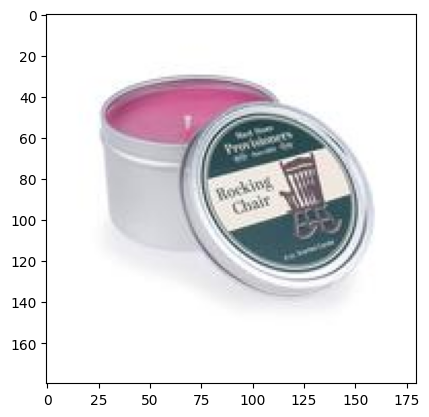

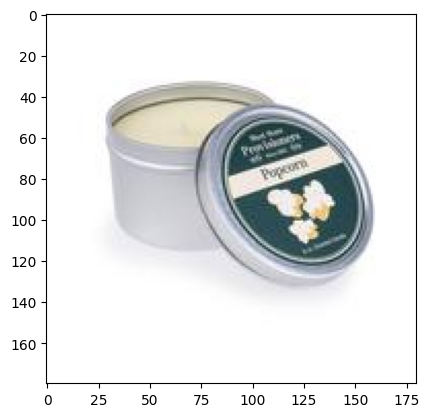

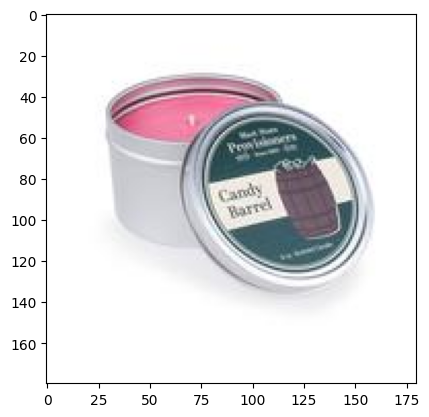

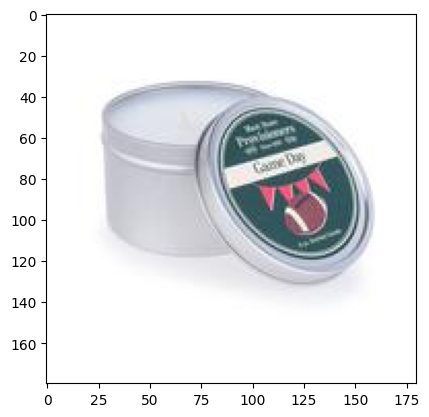

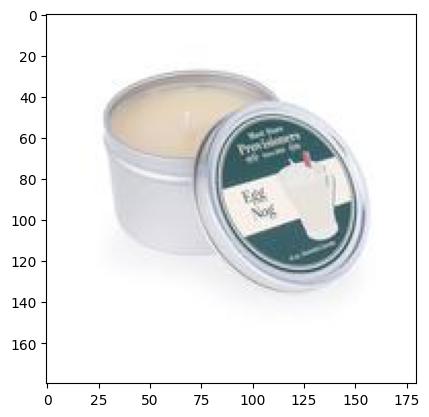

In [59]:
show_recommendations(product_id=211642)

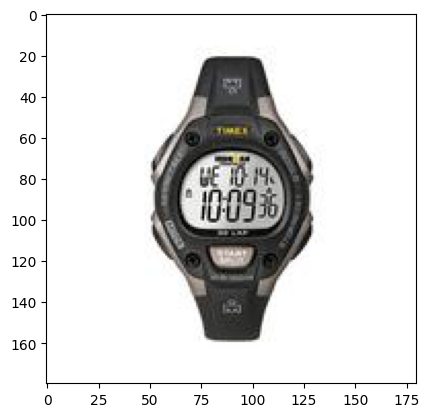

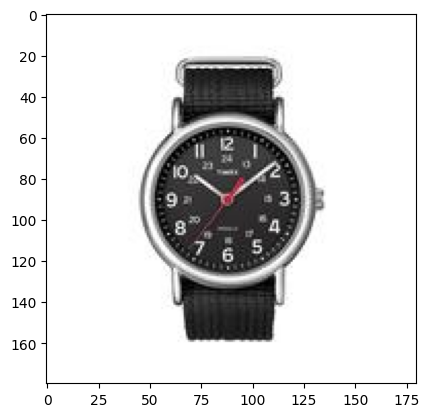

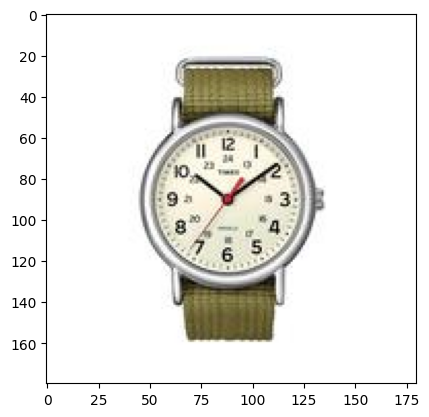

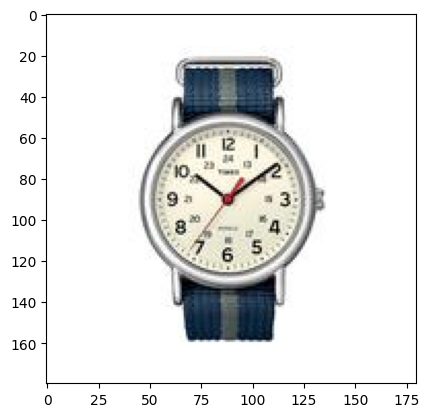

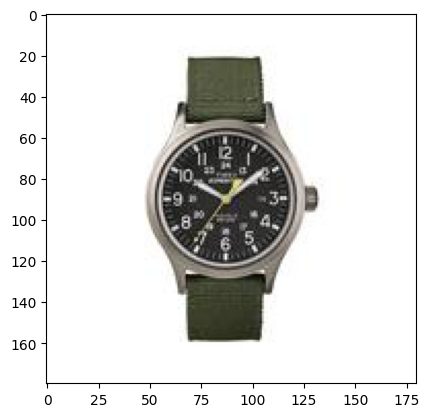

In [57]:
show_recommendations(product_id=206223)

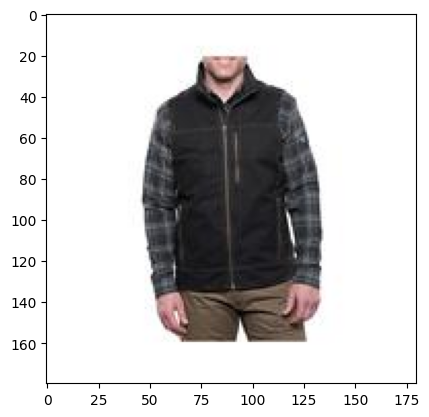

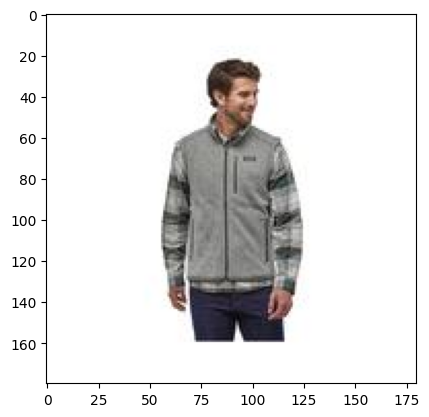

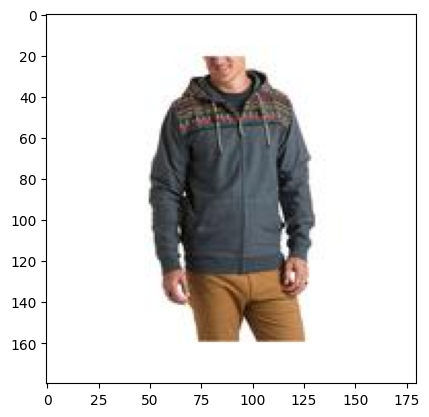

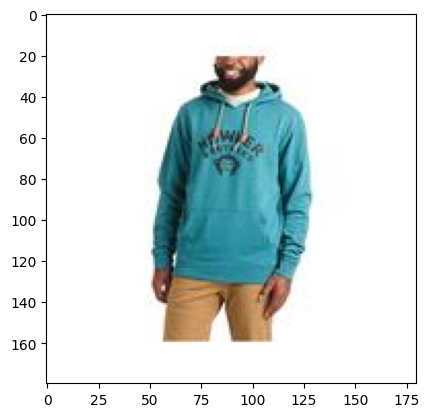

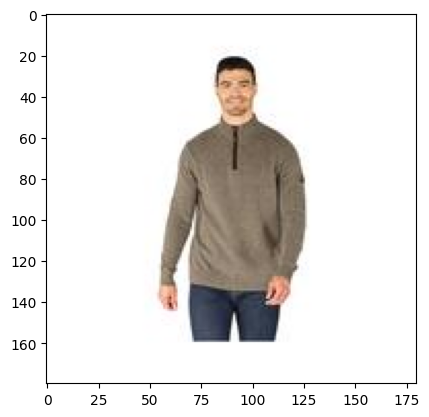

In [58]:
show_recommendations(product_id=203509)

Recommendation using Class for content based recommendation

In [ ]:
"class for loading data"
class LoadData:
    def __init__(self):
        self.data=pd.read_csv("mast_product_level_information.csv")
        
    def load_hdf5(self):
            with h5py.File('C:\Celerant\my_code\preprocessing_fun_for_content_final\mast_con_rec\cosine_sim.hdf5', 'r') as f:
                self.cosine_sim = f['data'][()]
                return self.cosine_sim

In [ ]:
"calling the LoadData class"
loaddata=LoadData()
df=loaddata.data#---- loading original df
print(df.columns)
"loading cosine_sim file"
cosine_sim=loaddata.load_hdf5()


In [ ]:
df.shape

In [ ]:
"class for clean taxonomy and column"
class ContentBasedRec:
    "content based recommendation class"
    def __init__(self,data):
        self.data=data
    def clean_taxanomy(self,data):
        tax_list=list(map(lambda x: ",".join(list(set(chain.from_iterable(list(i.split(">") for i in x.split("|")))))),self.data['Taxonomy_List']))
        self.data.insert(loc = 6,column = 'clean_taxanomy_list',value = tax_list)
        return self.data

    # def filter_keywords(self,doc):
    #         self.doc=self.doc.lower()
    #         stop_free = " ".join([i for i in self.doc.split() if i not in stop_words])
    #         punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    #         word_tokens = word_tokenize(punc_free)
    #         filtered_sentence = [(lem.lemmatize(w, "v")) for w in word_tokens]
    #         return filtered_sentence 
    #     # apply filter to all the columns

    # def clean_data(self,data):
    #         self.data['all_Taxonomy'] = self.data['clean_taxanomy_list'].astype("str").apply(filter_keywords)
    #         self.data["all_data"] = self.data['all_Taxonomy'].apply(lambda x: ' '.join(x))
    #         #data.insert(loc = 7,column = 'all_Taxonomy',value = data['all_Taxonomy'] )
    #         return self.data

In [ ]:
"calling the ContentBasedRec class to clean data "
t=ContentBasedRec(df)
res=t.clean_taxanomy(data=df)

#clean_d=ContentBasedRec(res)
#res_clean_df=t.clean_data(data=res)

In [ ]:
res.head()

In [ ]:
res_clean_df.shape

In [ ]:
"final recommendation class"
class Recommendation:
    
    #indices = pd.Series(df.index, index=df['Name'])
    def __init__(self,title,cosine_sim,product_name,data):
        self.title=title
        self.cosine_sim=cosine_sim
        #self.indices = indices
        self.data=data
        
    def cos_sim(self,title,cosine_sim):
        self.indices=pd.Series(self.data.index, index=self.data['Name'])
        id=self.indices[self.title]
        score=sorted(list(enumerate(self.cosine_sim[id])),key=lambda x: x[1],reverse=True)[:30]
        new_score=[]
        for i in score:
            if i[0]==id:
                score.remove(i)
            new_score.append(i[1])
        
        return new_score

    
    def recommend(self,title,cosine_sim,data):
        self.indices=pd.Series(self.data.index, index=self.data['Name'])
        product_name = self.data['Name']
        idx = self.indices[self.title]
        sim_scores = list(enumerate(self.cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:31]
        product_indices = [i[0] for i in sim_scores]
        titles_lst=product_name.iloc[product_indices]
        
        return pd.concat([res[res['Name']==titles_lst.tolist()[i]] for i in range (len(titles_lst.tolist()))]).head(29)

In [ ]:
clean_data=pd.read_csv("C:/Celerant/my_code/preprocessing_fun_for_content_final/clean_file.csv")
clean_data.head(2)

In [ ]:
test_sample="Ye Olde English Fruit and Nut Cake"
test_sample=test_sample.lower()
clean_data.loc[clean_data['product_id'] == 433].head()

In [ ]:
"final recommendation class"
class Recommendation:
    
    #indices = pd.Series(df.index, index=df['Name'])
    def __init__(self,cosine_sim,product_name,data):
        #self.title=title
        self.cosine_sim=cosine_sim
        #self.indices = indices
        self.data=data
        
    def cos_sim(self,title):
        self.indices=pd.Series(self.data.index, index=self.data['Product_ID'])
        id=self.indices[title]
        score=sorted(list(enumerate(self.cosine_sim[id])),key=lambda x: x[1],reverse=True)[:30]
        new_score=[]
        for i in score:
            if i[0]==id:
                score.remove(i)
            new_score.append(i[1])
        
        return new_score

    
    def recommend(self,title):
        self.indices=pd.Series(self.data.index, index=self.data['Product_ID'])
        product_id = self.data['Product_ID']
        idx = self.indices[title]
        sim_scores = list(enumerate(self.cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:31]
        product_indices = [i[0] for i in sim_scores]
        titles_lst=product_id.iloc[product_indices]
        
        return pd.concat([res[res['Product_ID']==titles_lst.tolist()[i]] for i in range (len(titles_lst.tolist()))]).head(29)

In [ ]:

test_sample=221090
rec=Recommendation(cosine_sim=cosine_sim,data=res,product_name=res['Product_ID'])
df_rec=rec.recommend(test_sample)
new_score=rec.cos_sim(test_sample)
df_rec["Cosine_sim"]=new_score
df_rec.head(5)

In [ ]:
#for inventory count
inv_lst= df_rec["Inventory_Count"].to_list()
inv_lst_sorted = inv_lst[:]
inv_lst_sorted.sort(reverse = True)
# if (df_rec["Inventory_Count"]== max):
#     df_rec

In [ ]:
len(inv_lst_sorted)

In [ ]:
data_json  = df_rec.head(5).to_json(orient="table")
import json
json.loads(data_json)['data']

Recommendation using function for content based recommendation

In [ ]:
#all functions

def clean_taxanomy(data):
    tax_list=list(map(lambda x: ",".join(list(set(chain.from_iterable(list(i.split(">") for i in x.split("|")))))),data['Taxonomy_List']))
    data.insert(loc = 6,column = 'clean_taxanomy_list',value = tax_list)
    return data

"fuction to clean all_data and make all_data column "
def filter_keywords(doc):
        doc=doc.lower()
        stop_free = " ".join([i for i in doc.split() if i not in stop_words])
        punc_free = "".join(ch for ch in stop_free if ch not in exclude)
        word_tokens = word_tokenize(punc_free)
        filtered_sentence = [(lem.lemmatize(w, "v")) for w in word_tokens]
        return filtered_sentence 
    # apply filter to all the columns

def clean_data(data):
        data['all_Taxonomy'] = data['clean_taxanomy_list'].astype("str").apply(filter_keywords)
        data["all_data"] = data['all_Taxonomy'].apply(lambda x: ' '.join(x))
        #data.insert(loc = 7,column = 'all_Taxonomy',value = data['all_Taxonomy'] )
        return data

#  " function to make cosine similariry"

def tfidf_cossim(data):
        tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
        tfidf_matrix = tf.fit_transform(data)
        from sklearn.metrics.pairwise import cosine_similarity
        #tfidf_matrix = tfidf_matrix.astype(np.float32)
        cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
        cosine_sim = cosine_sim.astype(np.float32)
        return cosine_sim

"to call the function "
cosine_sim=tfidf_cossim(product_data['all_data'])

 "function to load cosine similaritty file "

def store_hdf5(data):
    with h5py.File('C:\Celerant\my_code\preprocessing_fun_for_content_final\mast_con_rec\cosine_sim.hdf5','w') as f:
        f.create_dataset('data',data=cosine_sim, dtype='float16',compression='gzip',compression_opts=9)
        #return 


def load_hdf5():
    with h5py.File('C:\Celerant\my_code\preprocessing_fun_for_content_final\mast_con_rec\cosine_sim.hdf5', 'r') as f:
        cosine_sim = f['data'][()]
        return cosine_sim

def cos_sim(title,cosine_sim):
    id=indices[title]
    score=sorted(list(enumerate(cosine_sim[id])),key=lambda x: x[1],reverse=True)[:30]
    new_score=[]
    for i in score:
        if i[0]==id:
            score.remove(i)
        new_score.append(i[1])
       
    return new_score


def recommend(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    product_indices = [i[0] for i in sim_scores]
    titles_lst=titles.iloc[product_indices]
    
    return pd.concat([df[df['Name']==titles_lst.tolist()[i]] for i in range (len(titles_lst.tolist()))]).head(29)

In [ ]:
df=pd.read_csv("mast_product_level_information.csv")
print(df.columns)
clean_taxanomy(df)
%time new_data=clean_data(df)
%time cosine_sim=load_hdf5()

titles = df['Name']
indices = pd.Series(df.index, index=df['Name'])
test_sample="HeatSheets Survival Blanket - 2 Person"
df_rec=recommend(test_sample)
new_score=cos_sim(test_sample,cosine_sim)
df_rec["Cosine_sim"]=new_score
df_rec.head(5)

In [ ]:
df_rec["clean_taxanomy_list"]

In [ ]:
data_json  = df_rec.head(5).to_json(orient="table")

In [ ]:
import json
json.loads(data_json)['data']